In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold


In [2]:
data = pd.read_csv('/content/breast-cancer.csv');

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data["diagnosis"]=data["diagnosis"].map({"B": 1, "M": 2})
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,2,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
features = data.drop(columns=['id', 'diagnosis'])
target = data['diagnosis']  # Целевой признак

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# модель случайного леса
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

# предсказания на тестовой выборке
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Точность модели случайного леса: {accuracy:.4f}')

Точность модели случайного леса: 0.9649


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
data = pd.read_csv('/content/breast-cancer.csv');
data.head()

data["diagnosis"]=data["diagnosis"].map({"B": 1, "M": 2})
data.head()

features = data.drop(columns=['id', 'diagnosis'])
target = data['diagnosis']

threshold = 0.02  # Порог дисперсии
selector = VarianceThreshold(threshold=threshold)
features_reduced = selector.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_reduced, target, test_size=0.2, random_state=42)
#обучила модель
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Точность модели случайного леса после отбора признаков с низкой дисперсией: {accuracy:.4f}')

Точность модели случайного леса после отбора признаков с низкой дисперсией: 0.9737


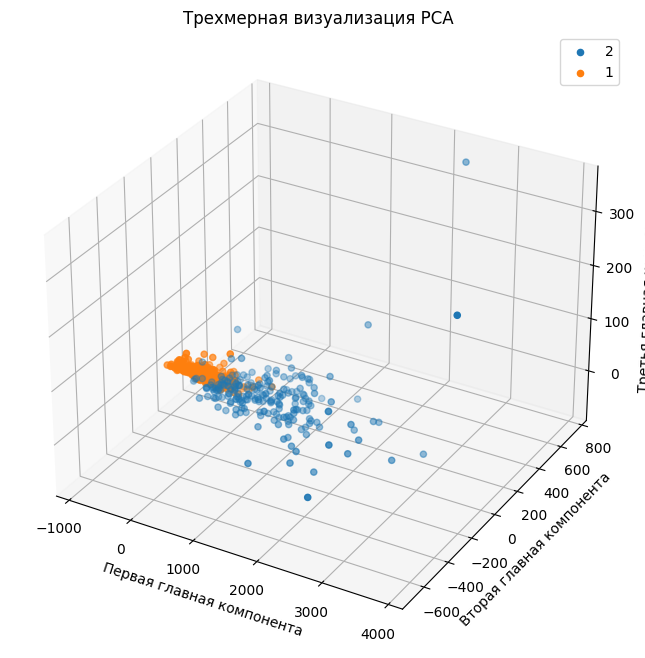

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Прочтите данные из файла
filename = '/content/breast-cancer.csv'  # Замените 'filename' на путь к вашему файлу с данными
data = pd.read_csv(filename)

# Преобразуйте целевой признак
data["diagnosis"] = data["diagnosis"].map({"B": 1, "M": 2})

# Разделите данные на признаки и целевой признак
features = data.drop(columns=['id', 'diagnosis'])
target = data['diagnosis']

# Примените метод PCA с 3 главными компонентами
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features)

# Создайте трехмерный график
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Визуализация данных по целевому признаку для разных цветов точек
for target_value in data['diagnosis'].unique():
    mask = (target == target_value)
    ax.scatter(features_pca[mask, 0], features_pca[mask, 1], features_pca[mask, 2], label=target_value)

# Установите метки осей
ax.set_xlabel('Первая главная компонента')
ax.set_ylabel('Вторая главная компонента')
ax.set_zlabel('Третья главная компонента')

# Установите заголовок и легенду
ax.set_title('Трехмерная визуализация PCA')
ax.legend()

# Отобразите график
plt.show()


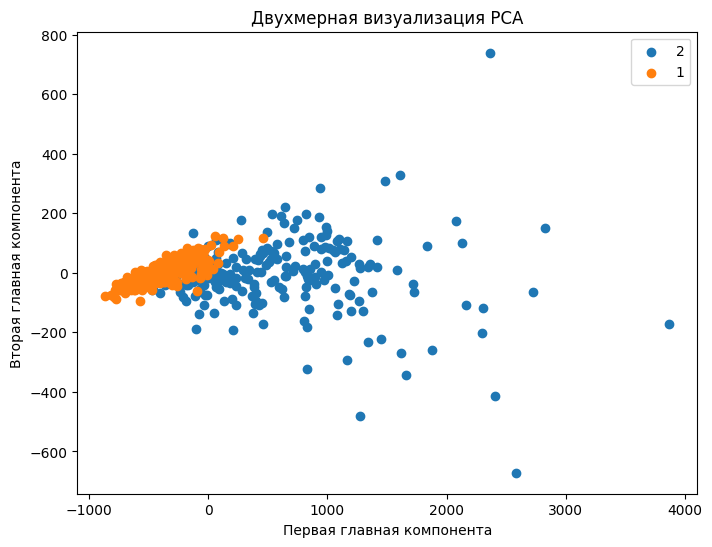

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv('/content/breast-cancer.csv');

data["diagnosis"]=data["diagnosis"].map({"B": 1, "M": 2})
data.head()
features = data.drop(columns=['id', 'diagnosis'])
target = data['diagnosis']

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)


plt.figure(figsize=(8, 6))
# данные по целевому признаку для разных цветов точек
for target_value in data['diagnosis'].unique():
    mask = (target == target_value)
    plt.scatter(features_pca[mask, 0], features_pca[mask, 1], label=target_value)

plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('Двухмерная визуализация PCA')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time

data = pd.read_csv('/content/breast-cancer.csv');

data["diagnosis"]=data["diagnosis"].map({"B": 1, "M": 2})
data.head()

features = data.drop(columns=['id', 'diagnosis'])
target = data['diagnosis']

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

start_time = time.time()

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

end_time = time.time()

accuracy = accuracy_score(y_test, y_pred)

elapsed_time = end_time - start_time

print(f'Точность модели случайного леса на PCA с двумя компонентами: {accuracy:.4f}')
print(f'Время обучения и предсказаний: {elapsed_time:.4f} секунд')


Точность модели случайного леса на PCA с двумя компонентами: 0.9561
Время обучения и предсказаний: 0.1861 секунд


Количество главных компонент, необходимых для сохранения 90% дисперсии: 1


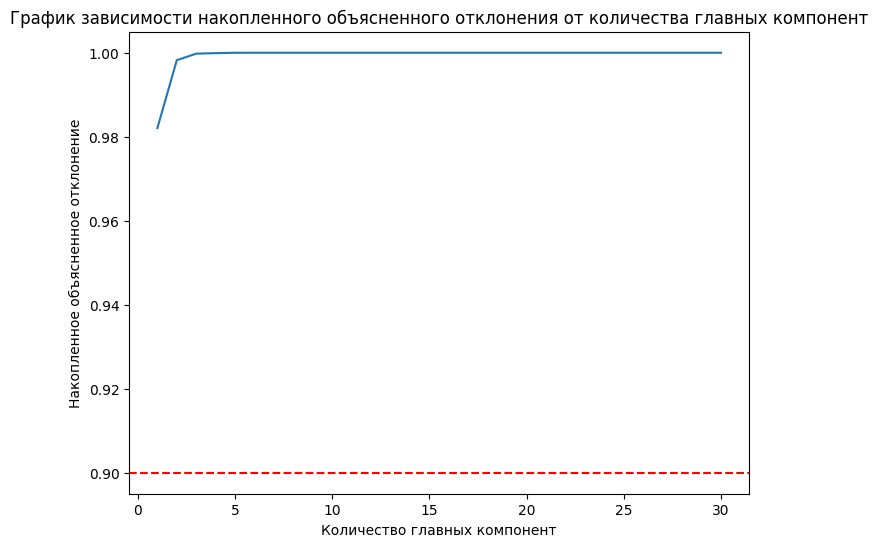

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv('/content/breast-cancer.csv');

data["diagnosis"]=data["diagnosis"].map({"B": 1, "M": 2})
data.head()

features = data.drop(columns=['id', 'diagnosis'])

pca = PCA()
pca.fit(features)

# накопленное объясненное отклонение
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# количество главных компонент, чтобы сохранить 90% дисперсии
num_components = next(i for i, v in enumerate(cumulative_explained_variance) if v >= 0.9) + 1

print(f'Количество главных компонент, необходимых для сохранения 90% дисперсии: {num_components}')

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Количество главных компонент')
plt.ylabel('Накопленное объясненное отклонение')
plt.title('График зависимости накопленного объясненного отклонения от количества главных компонент')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.show()


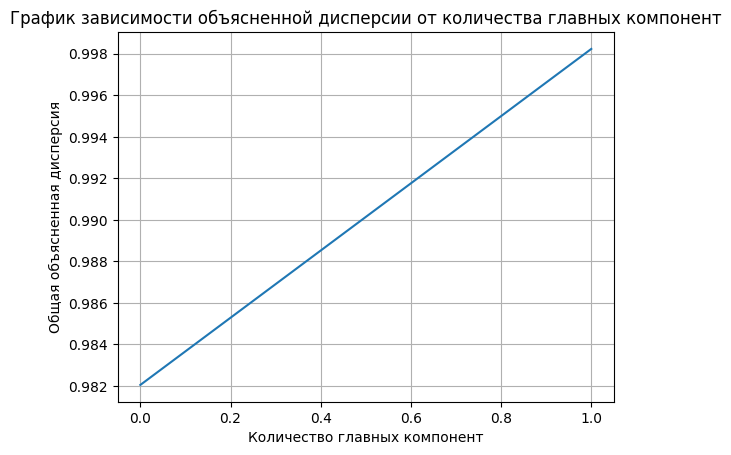

In [ ]:
pca_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pca_variance)
plt.xlabel('Количество главных компонент')
plt.ylabel('Общая объясненная дисперсия')
plt.title('График зависимости объясненной дисперсии от количества главных компонент')
plt.grid(True)
plt.show()